In [1]:
import pandas as pd
import numpy as np  
import math  
import matplotlib.pyplot as plt  
from scipy.stats import norm  
from pandas_datareader import data
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import *

In [2]:
#upload data
df = pd.read_csv(r'data_real1.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.sort_values(by='Date')
df= df.set_index('Date').asfreq('d')
df

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2014-11-24,0.16320,0.16270,0.16320,0.16280
2014-11-25,0.16280,0.16240,0.16290,0.16290
2014-11-26,0.16290,0.16260,0.16300,0.16280
2014-11-27,0.16280,0.16260,0.16310,0.16280
2014-11-28,0.16300,0.16240,0.16300,0.16270
...,...,...,...,...
2022-11-14,0.14065,0.14065,0.14209,0.14136
2022-11-15,0.14136,0.14136,0.14231,0.14190
2022-11-16,0.14190,0.14102,0.14190,0.14109


In [4]:
df=df.dropna()
df

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2014-11-24,0.16320,0.16270,0.16320,0.16280
2014-11-25,0.16280,0.16240,0.16290,0.16290
2014-11-26,0.16290,0.16260,0.16300,0.16280
2014-11-27,0.16280,0.16260,0.16310,0.16280
2014-11-28,0.16300,0.16240,0.16300,0.16270
...,...,...,...,...
2022-11-14,0.14065,0.14065,0.14209,0.14136
2022-11-15,0.14136,0.14136,0.14231,0.14190
2022-11-16,0.14190,0.14102,0.14190,0.14109


In [5]:
df1=df[(df.index<='2022-07-01')]
df1

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2014-11-24,0.16320,0.16270,0.16320,0.16280
2014-11-25,0.16280,0.16240,0.16290,0.16290
2014-11-26,0.16290,0.16260,0.16300,0.16280
2014-11-27,0.16280,0.16260,0.16310,0.16280
2014-11-28,0.16300,0.16240,0.16300,0.16270
...,...,...,...,...
2022-06-27,0.14943,0.14934,0.14957,0.14939
2022-06-28,0.14939,0.14898,0.14971,0.14909
2022-06-29,0.14904,0.14901,0.14951,0.14920


In [6]:
#df1=df[(df.index<='2022-07-02')]
#df1=df1.dropna()
df1=df1[-90:]
df1

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2022-02-28,0.15824,0.15823,0.15859,0.15846
2022-03-01,0.15846,0.15832,0.15847,0.15837
2022-03-02,0.15837,0.15814,0.15846,0.15814
2022-03-03,0.15814,0.15814,0.15836,0.15818
2022-03-04,0.15827,0.15814,0.15837,0.15820
...,...,...,...,...
2022-06-27,0.14943,0.14934,0.14957,0.14939
2022-06-28,0.14939,0.14898,0.14971,0.14909
2022-06-29,0.14904,0.14901,0.14951,0.14920


In [7]:
#define monte_carlo function
def monte_carlo(start_exchange_rates,days,mean,standard_variance):
        
    # Define a return array
    returns= np.zeros(days-1)
    
    #Define a exchange rates array
    exchange_rates = np.zeros(days)
    exchange_rates[0]=start_exchange_rates

    for i in range(1,days):
        
        #Calculate return values x
        returns[i-1]=mean+standard_variance*np.random.standard_normal(size=None)
        
        #Calculate future values of exchange rates
        exchange_rates[i]=exchange_rates[i-1]*math.exp(returns[i-1])
        
    return exchange_rates

Inspection

In [8]:
days =len(df1)-1
#Calculate the daily periodic return x
X=[]
for t in range(0,days):
    x=math.log(df1['OpeningPrice'][t+1]/df1['OpeningPrice'][t],math.e)
    X.append(x)
X
#Calculate the mean, variance and standard deviation of daily periodic returns
arr_mean = np.mean(X)
arr_var = np.var(X)
arr_std = np.std(X,ddof=1)
print('mean:',arr_mean)
print('variance:',arr_var)
print('standard_variance:',arr_std)

mean: -0.000659451020573404
variance: 1.209570529920237e-05
standard_variance: 0.003497592957418604


In [9]:
# Test for the smoothness of x
# Unit root test
dftest = adfuller(X,autolag='BIC')
dfoutput = pd.Series(dftest[0:4], index=['adf','p-value','usedlag','Number of Observations Used'])
print("Unit root test results:\n",dfoutput)

单位根检验结果:
 adf                           -8.223088e+00
p-value                        6.351876e-13
usedlag                        0.000000e+00
Number of Observations Used    8.800000e+01
dtype: float64


In [10]:
X1=np.array(X)
#len(X1)

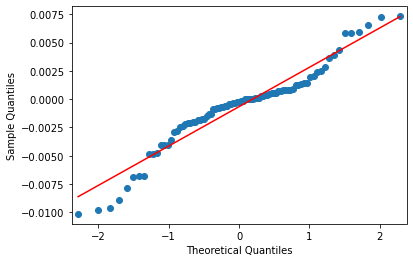

In [11]:
#Normal QQ chart
fig = sm.qqplot(X1, line='s')
plt.show()

In [12]:
start_day=df1.index[-1]
start_day
#df[df.index='']

Timestamp('2022-07-01 00:00:00')

In [13]:
df3=df.reset_index()
df3

,Date,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
0,2014-11-24,0.16320,0.16270,0.16320,0.16280
1,2014-11-25,0.16280,0.16240,0.16290,0.16290
2,2014-11-26,0.16290,0.16260,0.16300,0.16280
3,2014-11-27,0.16280,0.16260,0.16310,0.16280
4,2014-11-28,0.16300,0.16240,0.16300,0.16270
...,...,...,...,...,...
2079,2022-11-14,0.14065,0.14065,0.14209,0.14136
2080,2022-11-15,0.14136,0.14136,0.14231,0.14190
2081,2022-11-16,0.14190,0.14102,0.14190,0.14109
2082,2022-11-17,0.14109,0.13958,0.14109,0.13968


89 90
mean: -0.000659451020573404
variance: 1.209570529920237e-05
standard_variance: 0.003497592957418604


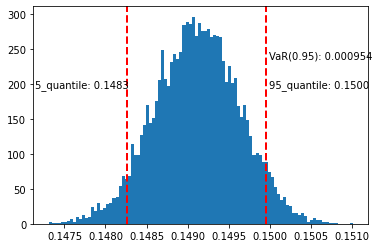

0.14911372758456706
0     0.15846
1     0.15837
2     0.15814
3     0.15827
4     0.15818
       ...   
85    0.14939
86    0.14904
87    0.14910
88    0.14922
89    0.14917
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006788269704635516
variance: 1.2049348847201193e-05
standard_variance: 0.0034908843100165017


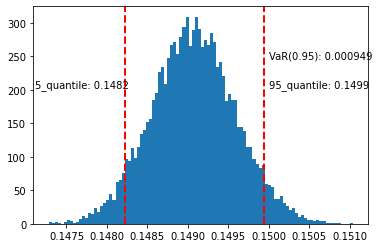

0.14907203161955776
0     0.15837
1     0.15814
2     0.15827
3     0.15818
4     0.15816
       ...   
85    0.14904
86    0.14910
87    0.14922
88    0.14917
89    0.14920
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006701840419547581
variance: 1.2057835991960533e-05
standard_variance: 0.0034921135227116455


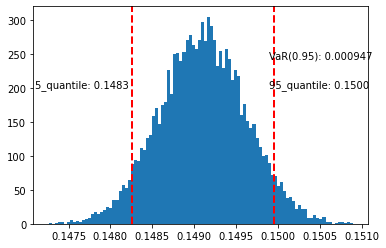

0.1491004886951939
0     0.15814
1     0.15827
2     0.15818
3     0.15816
4     0.15821
       ...   
85    0.14910
86    0.14922
87    0.14917
88    0.14920
89    0.14877
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006862834547598658
variance: 1.2105861859940859e-05
standard_variance: 0.003499061084346148


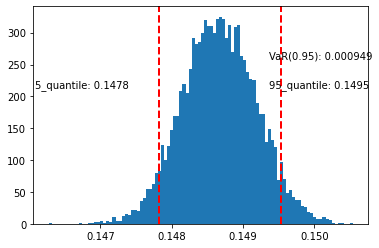

0.14866852680161288
0     0.15827
1     0.15818
2     0.15816
3     0.15821
4     0.15823
       ...   
85    0.14922
86    0.14917
87    0.14920
88    0.14877
89    0.14904
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006751427983354843
variance: 1.2150384179631203e-05
standard_variance: 0.0035054895131959836


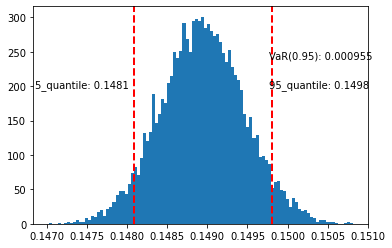

0.14893962217131526
0     0.15818
1     0.15816
2     0.15821
3     0.15823
4     0.15812
       ...   
85    0.14917
86    0.14920
87    0.14877
88    0.14904
89    0.14916
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006597086492207939
variance: 1.2174629224706407e-05
standard_variance: 0.0035089852214106104


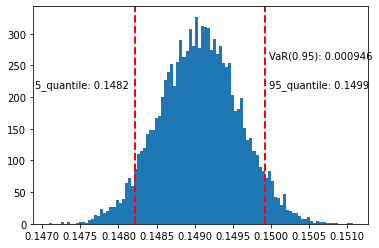

0.14906070455036155
0     0.15816
1     0.15821
2     0.15823
3     0.15812
4     0.15768
       ...   
85    0.14920
86    0.14877
87    0.14904
88    0.14916
89    0.14931
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006469943519526784
variance: 1.2202414833815844e-05
standard_variance: 0.0035129871389951843


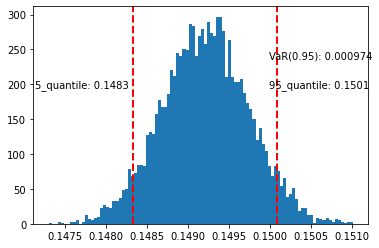

0.1492144986307607
0     0.15821
1     0.15823
2     0.15812
3     0.15768
4     0.15704
       ...   
85    0.14877
86    0.14904
87    0.14916
88    0.14931
89    0.14840
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007192352104235028
variance: 1.2522516652675272e-05
standard_variance: 0.003558766356235522


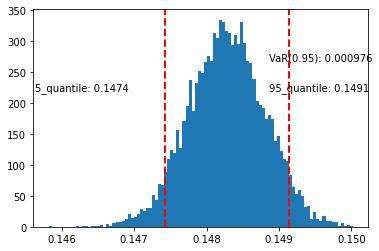

0.1482813968186838
0     0.15823
1     0.15812
2     0.15768
3     0.15704
4     0.15692
       ...   
85    0.14904
86    0.14916
87    0.14931
88    0.14840
89    0.14867
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007002313045576613
variance: 1.2586438697410526e-05
standard_variance: 0.0035678377779659633


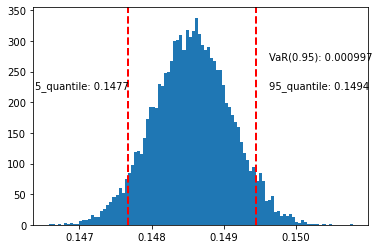

0.14855620050753782
0     0.15812
1     0.15768
2     0.15704
3     0.15692
4     0.15737
       ...   
85    0.14916
86    0.14931
87    0.14840
88    0.14867
89    0.14880
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006825968093201427
variance: 1.2613973790532486e-05
standard_variance: 0.003571738288535225


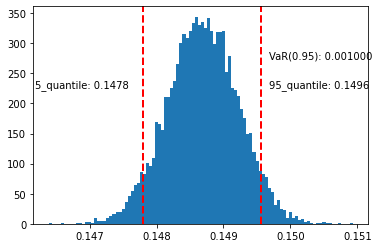

0.14868984659136814
0     0.15768
1     0.15704
2     0.15692
3     0.15737
4     0.15750
       ...   
85    0.14931
86    0.14840
87    0.14867
88    0.14880
89    0.14800
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007118583042735843
variance: 1.2812453606776654e-05
standard_variance: 0.003599729110709586


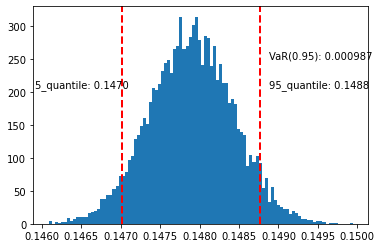

0.14789589575678147
0     0.15704
1     0.15692
2     0.15737
3     0.15750
4     0.15715
       ...   
85    0.14840
86    0.14867
87    0.14880
88    0.14800
89    0.14793
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006714759670119158
variance: 1.2684972081646244e-05
standard_variance: 0.003581776024776668


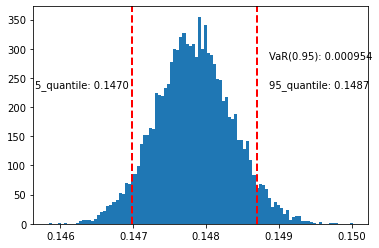

0.14783169845819838
0     0.15692
1     0.15737
2     0.15750
3     0.15715
4     0.15709
       ...   
85    0.14867
86    0.14880
87    0.14800
88    0.14793
89    0.14826
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006378497990199719
variance: 1.2778224085432334e-05
standard_variance: 0.003594917408969537


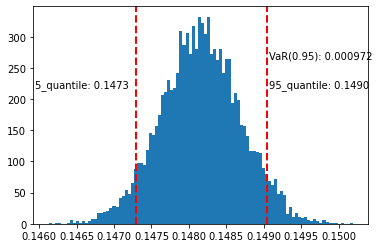

0.14816081618319968
0     0.15737
1     0.15750
2     0.15715
3     0.15709
4     0.15702
       ...   
85    0.14880
86    0.14800
87    0.14793
88    0.14826
89    0.14822
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006730568998826938
variance: 1.2640751859956817e-05
standard_variance: 0.0035755274810098056


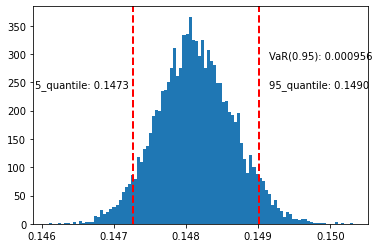

0.14812391402734634
0     0.15750
1     0.15715
2     0.15709
3     0.15702
4     0.15688
       ...   
85    0.14800
86    0.14793
87    0.14826
88    0.14822
89    0.14800
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006990245449614846
variance: 1.2622251565973235e-05
standard_variance: 0.003572910052444547


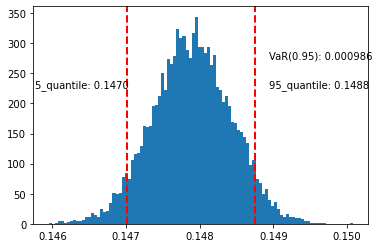

0.14789450753014202
0     0.15715
1     0.15709
2     0.15702
3     0.15688
4     0.15699
       ...   
85    0.14793
86    0.14826
87    0.14822
88    0.14800
89    0.14773
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006945447180905538
variance: 1.261034814546762e-05
standard_variance: 0.0035712249377785727


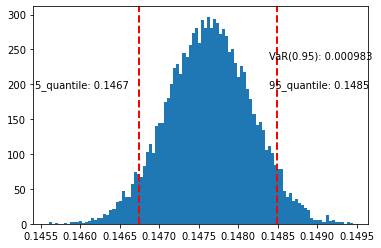

0.1476307714328271
0     0.15709
1     0.15702
2     0.15688
3     0.15699
4     0.15703
       ...   
85    0.14826
86    0.14822
87    0.14800
88    0.14773
89    0.14807
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006644242088901141
variance: 1.2709021330665944e-05
standard_variance: 0.00358516973483897


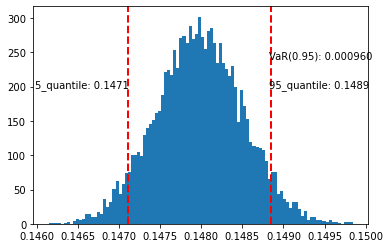

0.14797827137574676
0     0.15702
1     0.15688
2     0.15699
3     0.15703
4     0.15696
       ...   
85    0.14822
86    0.14800
87    0.14773
88    0.14807
89    0.14809
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006578987496707513
variance: 1.2715623016029689e-05
standard_variance: 0.003586100769933959


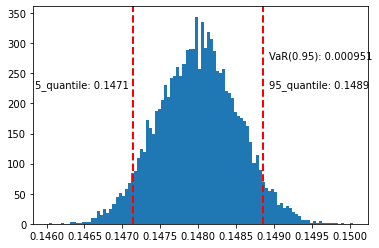

0.14800009467964143
0     0.15688
1     0.15699
2     0.15703
3     0.15696
4     0.15717
       ...   
85    0.14800
86    0.14773
87    0.14807
88    0.14809
89    0.14783
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006676204154504691
variance: 1.2728491748864557e-05
standard_variance: 0.003587914951689379


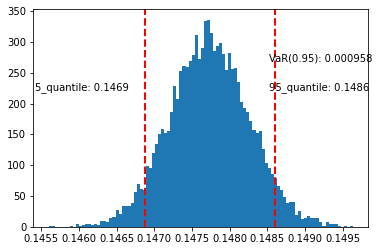

0.14773303041106506
0     0.15699
1     0.15703
2     0.15696
3     0.15717
4     0.15748
       ...   
85    0.14773
86    0.14807
87    0.14809
88    0.14783
89    0.14793
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006678979791919223
variance: 1.2727738810154953e-05
standard_variance: 0.0035878088307105906


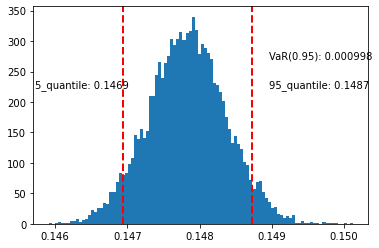

0.14782880521178846
0     0.15703
1     0.15696
2     0.15717
3     0.15748
4     0.15768
       ...   
85    0.14807
86    0.14809
87    0.14783
88    0.14793
89    0.14816
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006533044831347506
variance: 1.277340981716128e-05
standard_variance: 0.0035942401424288836


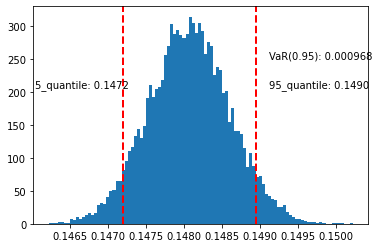

0.1480677134667558
0     0.15696
1     0.15717
2     0.15748
3     0.15768
4     0.15711
       ...   
85    0.14809
86    0.14783
87    0.14793
88    0.14816
89    0.14823
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006429873515874607
variance: 1.2787056992573346e-05
standard_variance: 0.003596159681993841


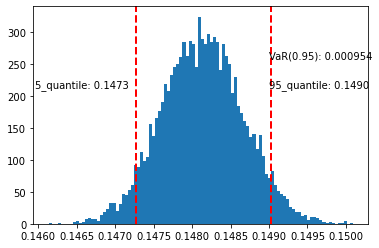

0.14813692181020863
0     0.15717
1     0.15748
2     0.15768
3     0.15711
4     0.15711
       ...   
85    0.14783
86    0.14793
87    0.14816
88    0.14823
89    0.14769
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000699017299438412
variance: 1.2841440117460969e-05
standard_variance: 0.0036037987698179274


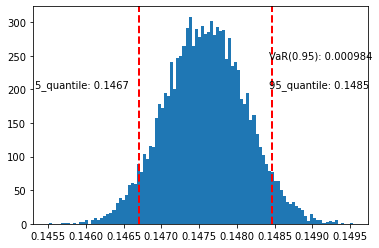

0.14758517042793934
0     0.15748
1     0.15768
2     0.15711
3     0.15711
4     0.15711
       ...   
85    0.14793
86    0.14816
87    0.14823
88    0.14769
89    0.14804
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006945613321076525
variance: 1.2866977478776869e-05
standard_variance: 0.0036073803697343576


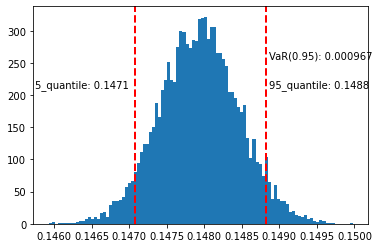

0.14793691149619298
0     0.15768
1     0.15711
2     0.15711
3     0.15711
4     0.15720
       ...   
85    0.14816
86    0.14823
87    0.14769
88    0.14804
89    0.14794
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007164143447723899
variance: 1.2823174183774266e-05
standard_variance: 0.0036012347982638184


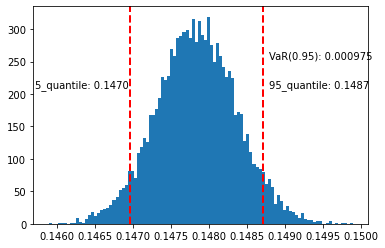

0.14783677975308396
0     0.15711
1     0.15711
2     0.15711
3     0.15720
4     0.15726
       ...   
85    0.14823
86    0.14769
87    0.14804
88    0.14794
89    0.14812
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006620611338662209
variance: 1.2767352320811516e-05
standard_variance: 0.003593387798430841


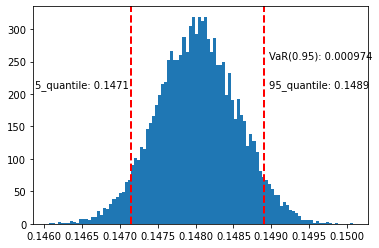

0.14801895545681024
0     0.15711
1     0.15711
2     0.15720
3     0.15726
4     0.15706
       ...   
85    0.14769
86    0.14804
87    0.14794
88    0.14812
89    0.14784
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006833212254621527
variance: 1.2778976611646042e-05
standard_variance: 0.003595023262088884


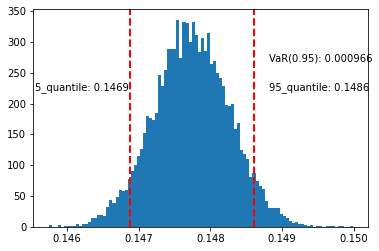

0.14774044026327637
0     0.15711
1     0.15720
2     0.15726
3     0.15706
4     0.15702
       ...   
85    0.14804
86    0.14794
87    0.14812
88    0.14784
89    0.14808
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000665095828025433
variance: 1.2833114743299954e-05
standard_variance: 0.0036026303713614077


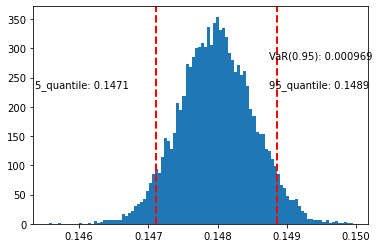

0.1479819126094998
0     0.15720
1     0.15726
2     0.15706
3     0.15702
4     0.15703
       ...   
85    0.14794
86    0.14812
87    0.14784
88    0.14808
89    0.14803
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006753249895472487
variance: 1.2816999809049984e-05
standard_variance: 0.0036003676942991288


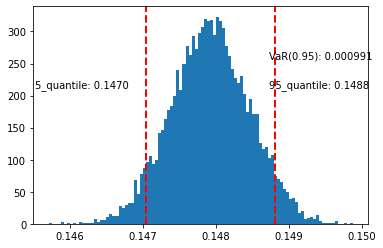

0.14792466855611316
0     0.15726
1     0.15706
2     0.15702
3     0.15703
4     0.15698
       ...   
85    0.14812
86    0.14784
87    0.14808
88    0.14803
89    0.14868
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006303836082507676
variance: 1.308973577958727e-05
standard_variance: 0.0036384725884748095


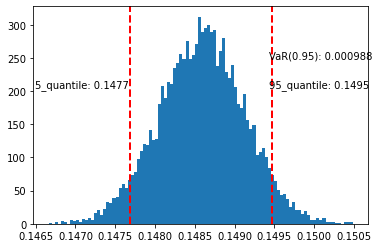

0.14858897673900495
0     0.15706
1     0.15702
2     0.15703
3     0.15698
4     0.15678
       ...   
85    0.14784
86    0.14808
87    0.14803
88    0.14868
89    0.14821
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000651659673909041
variance: 1.3156898016787225e-05
standard_variance: 0.003647794980741577


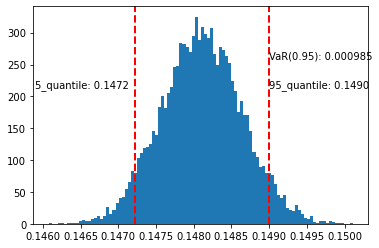

0.14810686361654904
0     0.15702
1     0.15703
2     0.15698
3     0.15678
4     0.15687
       ...   
85    0.14808
86    0.14803
87    0.14868
88    0.14821
89    0.14826
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006450078263093874
variance: 1.316607262803233e-05
standard_variance: 0.003649066605272438


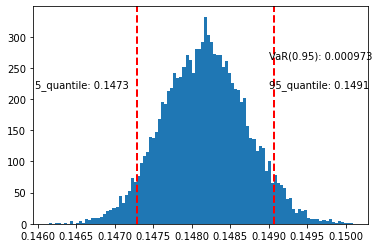

0.14816938466589996
0     0.15703
1     0.15698
2     0.15678
3     0.15687
4     0.15710
       ...   
85    0.14803
86    0.14868
87    0.14821
88    0.14826
89    0.14758
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000697376047939795
variance: 1.3333180649533375e-05
standard_variance: 0.0036721511496676366


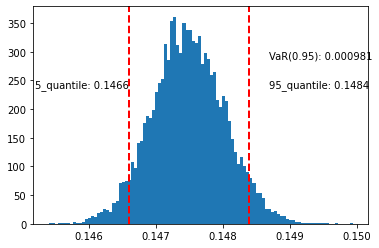

0.1474792596228911
0     0.15698
1     0.15678
2     0.15687
3     0.15710
4     0.15636
       ...   
85    0.14868
86    0.14821
87    0.14826
88    0.14758
89    0.14726
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007181873793044579
variance: 1.3355523017698244e-05
standard_variance: 0.0036752265678074245


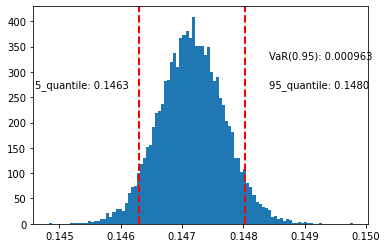

0.14715968161100595
0     0.15678
1     0.15687
2     0.15710
3     0.15636
4     0.15573
       ...   
85    0.14821
86    0.14826
87    0.14758
88    0.14726
89    0.14742
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006916617190947564
variance: 1.3387908540574671e-05
standard_variance: 0.0036796798590229807


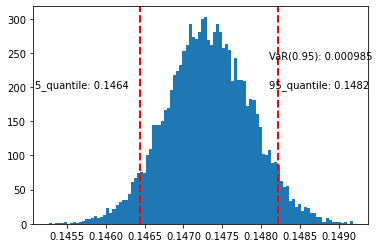

0.14732135789270961
0     0.15687
1     0.15710
2     0.15636
3     0.15573
4     0.15498
       ...   
85    0.14826
86    0.14758
87    0.14726
88    0.14742
89    0.14731
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007064969330483363
variance: 1.3369726490107878e-05
standard_variance: 0.003677180332839653


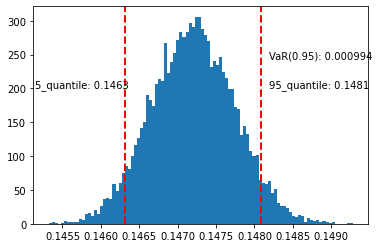

0.14719953108683476
0     0.15710
1     0.15636
2     0.15573
3     0.15498
4     0.15377
       ...   
85    0.14758
86    0.14726
87    0.14742
88    0.14731
89    0.14665
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000773412919529384
variance: 1.347313819848317e-05
standard_variance: 0.0036913740045744145


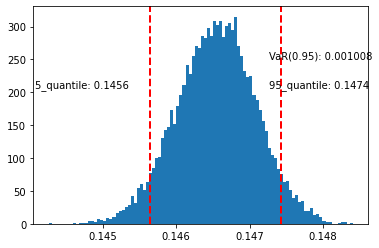

0.14654671248241075
0     0.15636
1     0.15573
2     0.15498
3     0.15377
4     0.15241
       ...   
85    0.14726
86    0.14742
87    0.14731
88    0.14665
89    0.14598
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007718136505760402
variance: 1.3460735152610184e-05
standard_variance: 0.003689674518446263


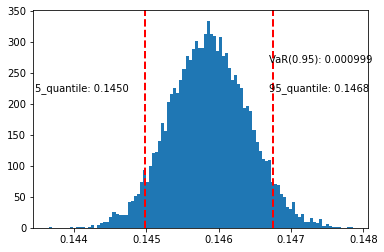

0.14586449815208194
0     0.15573
1     0.15498
2     0.15377
3     0.15241
4     0.15249
       ...   
85    0.14742
86    0.14731
87    0.14665
88    0.14598
89    0.14628
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0007033836542254702
variance: 1.3425894851049843e-05
standard_variance: 0.0036848964487477247


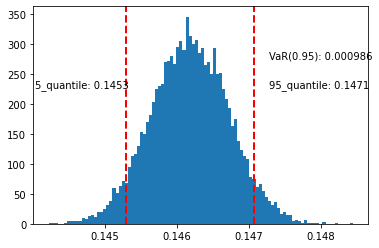

0.14617860780370998
0     0.15498
1     0.15377
2     0.15241
3     0.15249
4     0.15239
       ...   
85    0.14731
86    0.14665
87    0.14598
88    0.14628
89    0.14575
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0006899241697213749
variance: 1.333081540509792e-05
standard_variance: 0.00367182542392639


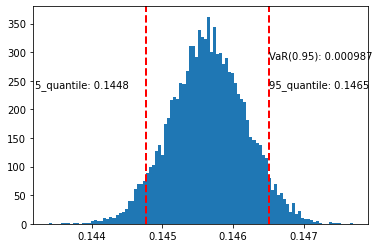

0.1456476634180733
0     0.15377
1     0.15241
2     0.15249
3     0.15239
4     0.15090
       ...   
85    0.14665
86    0.14598
87    0.14628
88    0.14575
89    0.14595
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005864481149154792
variance: 1.2793727862495879e-05
standard_variance: 0.0035970975985731334


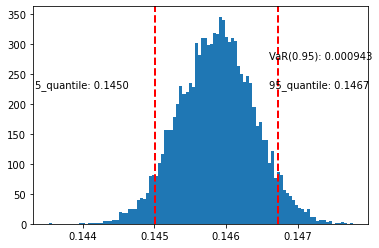

0.14586545261950773
0     0.15241
1     0.15249
2     0.15239
3     0.15090
4     0.15127
       ...   
85    0.14598
86    0.14628
87    0.14575
88    0.14595
89    0.14547
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005236446978919963
variance: 1.2098629293768708e-05
standard_variance: 0.0034980156828638624


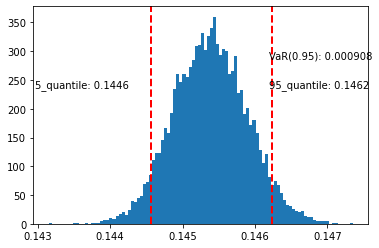

0.14538555810949624
0     0.15249
1     0.15239
2     0.15090
3     0.15127
4     0.15127
       ...   
85    0.14628
86    0.14575
87    0.14595
88    0.14547
89    0.14471
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005883964087305565
variance: 1.2331822006378942e-05
standard_variance: 0.00353156570763741


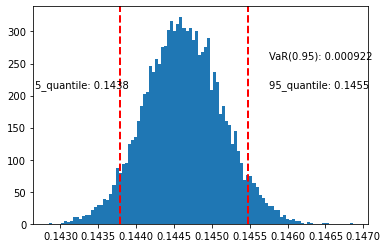

0.1446225417683456
0     0.15239
1     0.15090
2     0.15127
3     0.15127
4     0.15127
       ...   
85    0.14575
86    0.14595
87    0.14547
88    0.14471
89    0.14465
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005856853132542183
variance: 1.2332102272838817e-05
standard_variance: 0.0035316058385197135


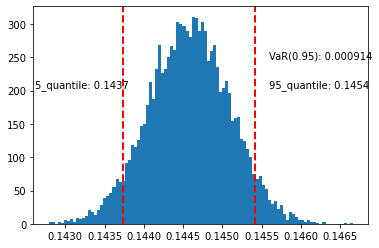

0.14458141984222922
0     0.15090
1     0.15127
2     0.15127
3     0.15127
4     0.15127
       ...   
85    0.14595
86    0.14547
87    0.14471
88    0.14465
89    0.14471
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00047062501150451865
variance: 1.1370814887759451e-05
standard_variance: 0.003391169222156596


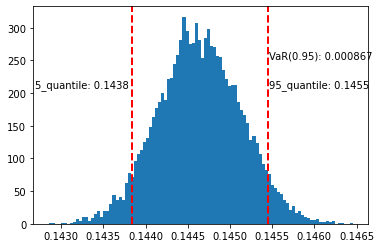

0.14464139593889627
0     0.15127
1     0.15127
2     0.15127
3     0.15127
4     0.15024
       ...   
85    0.14547
86    0.14471
87    0.14465
88    0.14471
89    0.14475
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0004950359901236366
variance: 1.128071417304423e-05
standard_variance: 0.003377706930275157


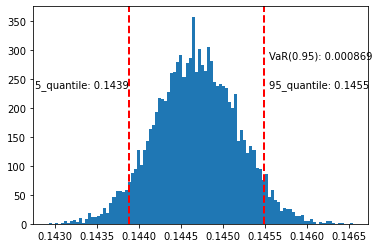

0.14468454773725867
0     0.15127
1     0.15127
2     0.15127
3     0.15024
4     0.14997
       ...   
85    0.14471
86    0.14465
87    0.14471
88    0.14475
89    0.14490
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00048339854210642183
variance: 1.1304153941526761e-05
standard_variance: 0.0033812143138696247


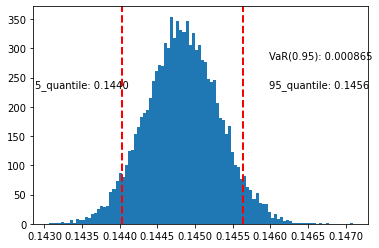

0.1448327981245294
0     0.15127
1     0.15127
2     0.15024
3     0.14997
4     0.14854
       ...   
85    0.14465
86    0.14471
87    0.14475
88    0.14490
89    0.14416
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005409272552143866
variance: 1.153977599863901e-05
standard_variance: 0.003416271332433266


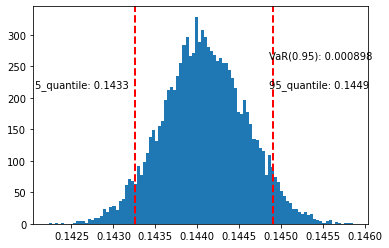

0.1440820675128893
0     0.15127
1     0.15024
2     0.14997
3     0.14854
4     0.14843
       ...   
85    0.14471
86    0.14475
87    0.14490
88    0.14416
89    0.14374
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005737101970091199
variance: 1.1598885097192337e-05
standard_variance: 0.0034250095780392256


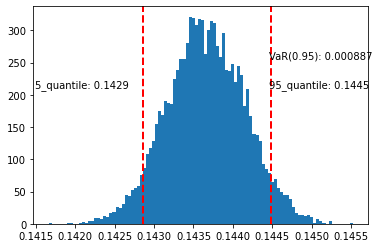

0.1436583364897131
0     0.15024
1     0.14997
2     0.14854
3     0.14843
4     0.14878
       ...   
85    0.14475
86    0.14490
87    0.14416
88    0.14374
89    0.14367
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00050241587008231
variance: 1.1153774148101373e-05
standard_variance: 0.0033586487731828295


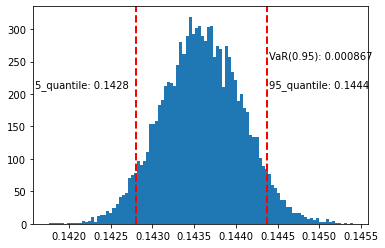

0.1435932004529233
0     0.14997
1     0.14854
2     0.14843
3     0.14878
4     0.14728
       ...   
85    0.14490
86    0.14416
87    0.14374
88    0.14367
89    0.14370
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0004798593371753913
variance: 1.1140067082228173e-05
standard_variance: 0.0033565843879779234


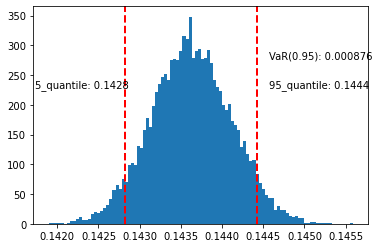

0.14362700489499167
0     0.14854
1     0.14843
2     0.14878
3     0.14728
4     0.14726
       ...   
85    0.14416
86    0.14374
87    0.14367
88    0.14370
89    0.14432
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0003238339991779464
variance: 1.0442316265076432e-05
standard_variance: 0.0032497659838681995


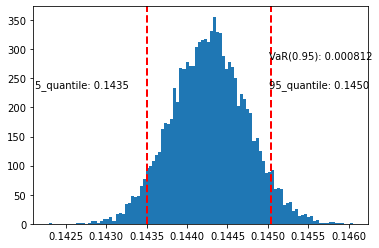

0.14427263363941042
0     0.14843
1     0.14878
2     0.14728
3     0.14726
4     0.14738
       ...   
85    0.14374
86    0.14367
87    0.14370
88    0.14432
89    0.14436
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0003123964815964739
variance: 1.044428967533445e-05
standard_variance: 0.0032500730430686377


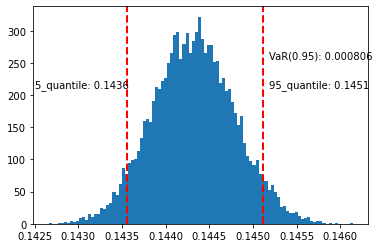

0.14432087167659896
0     0.14878
1     0.14728
2     0.14726
3     0.14738
4     0.14845
       ...   
85    0.14367
86    0.14370
87    0.14432
88    0.14436
89    0.14435
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.000339638187126421
variance: 1.036425356819862e-05
standard_variance: 0.003237596203501627


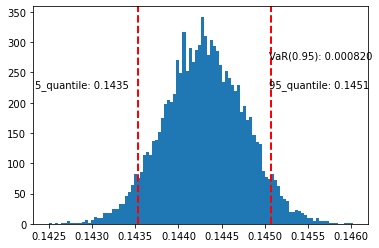

0.14430038580992072
0     0.14728
1     0.14726
2     0.14738
3     0.14845
4     0.14785
       ...   
85    0.14370
86    0.14432
87    0.14436
88    0.14435
89    0.14354
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00028900893171794303
variance: 9.59814763235479e-06
standard_variance: 0.0031156407835007823


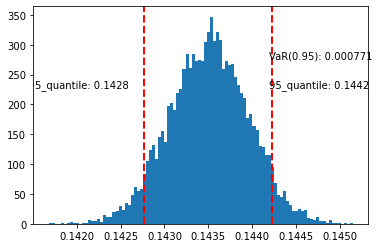

0.1435073688614876
0     0.14726
1     0.14738
2     0.14845
3     0.14785
4     0.14871
       ...   
85    0.14432
86    0.14436
87    0.14435
88    0.14354
89    0.14293
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00033533406763536303
variance: 9.772802848139397e-06
standard_variance: 0.0031438602745604265


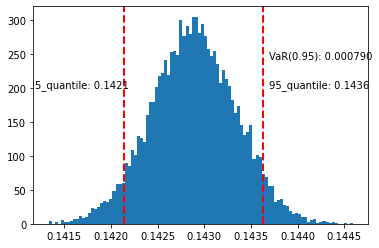

0.1428863392388279
0     0.14738
1     0.14845
2     0.14785
3     0.14871
4     0.14936
       ...   
85    0.14436
86    0.14435
87    0.14354
88    0.14293
89    0.14322
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00032171208719168653
variance: 9.820459472192015e-06
standard_variance: 0.0031515163973169858


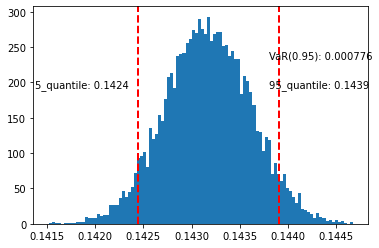

0.1431690869129808
0     0.14845
1     0.14785
2     0.14871
3     0.14936
4     0.15034
       ...   
85    0.14435
86    0.14354
87    0.14293
88    0.14322
89    0.14270
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00044386153625818617
variance: 9.287630823161493e-06
standard_variance: 0.0030648282305074785


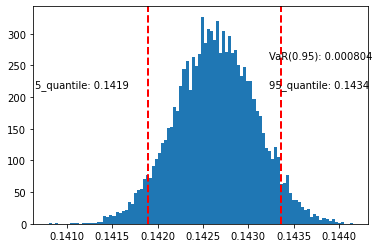

0.1426354037330646
0     0.14785
1     0.14871
2     0.14936
3     0.15034
4     0.15008
       ...   
85    0.14354
86    0.14293
87    0.14322
88    0.14270
89    0.14244
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.00041884705493156995
variance: 9.162285448669821e-06
standard_variance: 0.003044076597059992


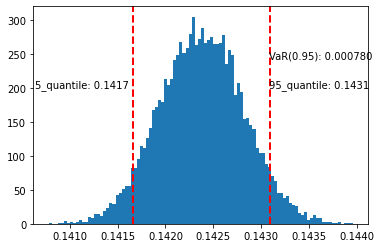

0.14237775021876334
0     0.14871
1     0.14936
2     0.15034
3     0.15008
4     0.14936
       ...   
85    0.14293
86    0.14322
87    0.14270
88    0.14244
89    0.14183
Name: OpeningPrice, Length: 90, dtype: float64
89 90
mean: -0.0005322353190345663
variance: 8.883436984686913e-06
standard_variance: 0.0029973963922444715


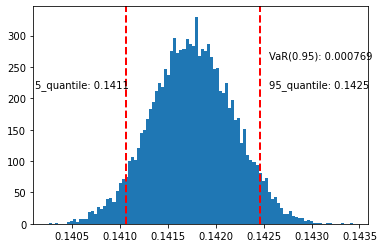

0.14175648917061917


In [14]:
#Forecast 60 business days of CNY/USD data with a window of 90 days and forecast 1 day later
#Calculate the daily periodic return x
df2=df1.copy()
df2=df2.reset_index()
CNY=df2['OpeningPrice']
#CNY=CNY.reset_index()
predict_time=60
S = df1['OpeningPrice'][-1] 
T=2 #Calculate the exchange rate data for the next day
d=df1.index[-1]
days=len(df2)-1
start_day=df1.index[-1]
first_lndex=df3[df3['Date']==start_day].index.values
def test10000(S,T,CNY):
    X=[]
    print(days,len(CNY))
    for t in range(0,days):
        x=math.log(CNY[t+1]/CNY[t],math.e)
        X.append(x)
    X
    #Calculate the mean, variance and standard deviation of daily periodic returns
    arr_mean = np.mean(X)
    arr_var = np.var(X)
    arr_std = np.std(X,ddof=1)
    print('mean:',arr_mean)
    print('variance:',arr_var)
    print('standard_variance:',arr_std)
    #Simulate 10,000 runs, and calculate VaR
    # Set a large numebr of runs
    runs = 10000
    # Create an empty matrix to hold the end price data
    simulations = np.zeros(runs)
    # Set the print options of numpy to only display 0-5 points from an array to suppress output
    np.set_printoptions(threshold=5)
    
    for run in range(runs):    
        # Set the simulation data point as the last stock price for that run
        monte_carlo(S,T,arr_mean,arr_std)
        simulations[run] = monte_carlo(S,T,arr_mean,arr_std)[T-1]
    return simulations

predict_data=0
predict_list=[]
lower_quantile_list5=[]
lower_quantile_list10=[]
upper_quantile_list=[]
lower_quantile5=0
lower_quantile10=0
upper_quantile=0
#start_list=[]
#start_list.append(S)
#d1=[]
#d1.append(d)
tmp=pd.DataFrame()
for i in range(0,predict_time):
    if(i!=0):
        CNY=CNY.drop(0)
        CNY[90]=float(df3.iloc[first_lndex+i]['OpeningPrice'].values)
        CNY=CNY.reset_index()
        del CNY['index']
        CNY=CNY.iloc[:,0]
        print(CNY)       
        S=CNY.iloc[-1]
    result=test10000(S,T,CNY)
    
    plt.hist(result,bins=100)  
    plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
    plt.figtext(0.13, 0.6, "5_quantile: %.4f" % np.percentile(result,5))
    plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)  
    plt.figtext(0.67, 0.6, "95_quantile: %.4f" % np.percentile(result,95))
    plt.figtext(0.67, 0.7, "VaR(0.95): %.6f" % (S - np.percentile(result,5),))
    plt.show() 
    
    lower_quantile5 =np.percentile(result,5)
    lower_quantile10 =np.percentile(result,10)
    upper_quantile=np.percentile(result,95)
    #print(lower_quantile5)
    #print(upper_quantile)
    lower_quantile_list5.append(lower_quantile5)
    lower_quantile_list10.append(lower_quantile10)
    upper_quantile_list.append(upper_quantile)
    predict_data=result.mean()
    predict_list.append(predict_data)
    print(predict_data)

#predict_list

In [15]:
real_data=df[(df.index>'2022-07-01')]['OpeningPrice']
real_data=real_data[0:60]
#len(real_data)
real_data

Date
2022-07-04    0.14917
2022-07-05    0.14920
2022-07-06    0.14877
2022-07-07    0.14904
2022-07-08    0.14916
2022-07-11    0.14931
2022-07-12    0.14840
2022-07-13    0.14867
2022-07-14    0.14880
2022-07-15    0.14800
2022-07-18    0.14793
2022-07-19    0.14826
2022-07-20    0.14822
2022-07-21    0.14800
2022-07-22    0.14773
2022-07-25    0.14807
2022-07-26    0.14809
2022-07-27    0.14783
2022-07-28    0.14793
2022-07-29    0.14816
2022-08-01    0.14823
2022-08-02    0.14769
2022-08-03    0.14804
2022-08-04    0.14794
2022-08-05    0.14812
2022-08-08    0.14784
2022-08-09    0.14808
2022-08-10    0.14803
2022-08-11    0.14868
2022-08-12    0.14821
2022-08-15    0.14826
2022-08-16    0.14758
2022-08-17    0.14726
2022-08-18    0.14742
2022-08-19    0.14731
2022-08-22    0.14665
2022-08-23    0.14598
2022-08-24    0.14628
2022-08-25    0.14575
2022-08-26    0.14595
2022-08-29    0.14547
2022-08-30    0.14471
2022-08-31    0.14465
2022-09-01    0.14471
2022-09-02    0.14475
2022-

In [16]:
predict1=pd.DataFrame({'Real_data':real_data,'Predict_data':predict_list,'95_quantile':upper_quantile_list,'5_quantile':lower_quantile_list5,
                       '10_quantile':lower_quantile_list10})

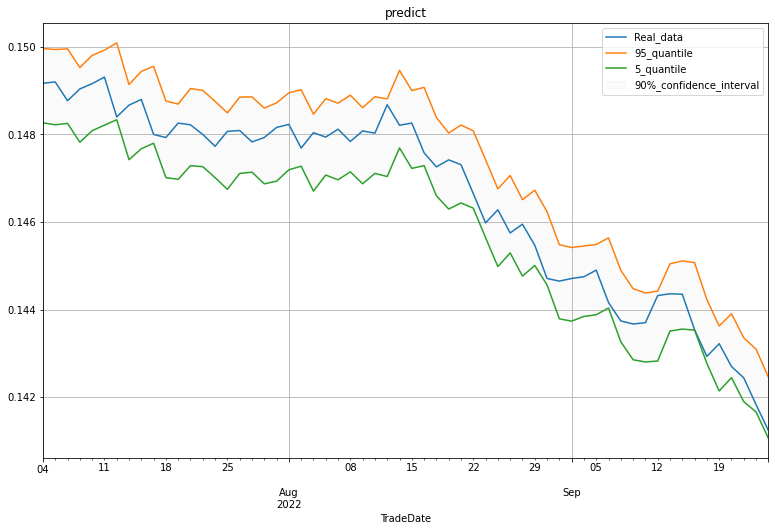

In [17]:
predict1['Real_data'].plot(figsize=(13,8),title='predict',label='Real_data')
#predict1['Predict_data'].plot(label='Predict_data')
predict1['95_quantile'].plot(label='95_quantile')
predict1['5_quantile'].plot(label='5_quantile')
plt.fill_between(predict1.index, predict1["5_quantile"], 
                 predict1["95_quantile"],color='k',alpha=.02,
                 label = "90%_confidence_interval")
plt.xlabel('TradeDate')
plt.legend()
plt.grid()
plt.show()

In [18]:
data_real1=df[df.index>='2022-07-01']
data_real1

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2022-07-01,0.14922,0.14887,0.14933,0.14919
2022-07-04,0.14917,0.14917,0.14953,0.14920
2022-07-05,0.14920,0.14869,0.14954,0.14876
2022-07-06,0.14877,0.14877,0.14923,0.14904
2022-07-07,0.14904,0.14893,0.14931,0.14916
...,...,...,...,...
2022-11-14,0.14065,0.14065,0.14209,0.14136
2022-11-15,0.14136,0.14136,0.14231,0.14190
2022-11-16,0.14190,0.14102,0.14190,0.14109


In [19]:
data_real1=data_real1.dropna()

In [20]:
data_real2=data_real1[0:61]

In [21]:
data_real2

,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
Date,,,,
2022-07-01,0.14922,0.14887,0.14933,0.14919
2022-07-04,0.14917,0.14917,0.14953,0.14920
2022-07-05,0.14920,0.14869,0.14954,0.14876
2022-07-06,0.14877,0.14877,0.14923,0.14904
2022-07-07,0.14904,0.14893,0.14931,0.14916
...,...,...,...,...
2022-09-19,0.14322,0.14240,0.14322,0.14270
2022-09-20,0.14270,0.14239,0.14271,0.14243
2022-09-21,0.14244,0.14172,0.14244,0.14181


In [22]:
data_real2=data_real2.reset_index()

In [23]:
data_real2

,Date,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
0,2022-07-01,0.14922,0.14887,0.14933,0.14919
1,2022-07-04,0.14917,0.14917,0.14953,0.14920
2,2022-07-05,0.14920,0.14869,0.14954,0.14876
3,2022-07-06,0.14877,0.14877,0.14923,0.14904
4,2022-07-07,0.14904,0.14893,0.14931,0.14916
...,...,...,...,...,...
56,2022-09-19,0.14322,0.14240,0.14322,0.14270
57,2022-09-20,0.14270,0.14239,0.14271,0.14243
58,2022-09-21,0.14244,0.14172,0.14244,0.14181
59,2022-09-22,0.14183,0.14089,0.14183,0.14123


In [24]:
t1=predict1['5_quantile']
t1=t1.reset_index()
t2=predict1['10_quantile']
t2=t2.reset_index()

In [25]:
t1

,Date,5_quantile
0,2022-07-04,0.148266
1,2022-07-05,0.148221
2,2022-07-06,0.148253
3,2022-07-07,0.147821
4,2022-07-08,0.148085
5,2022-07-11,0.148214
6,2022-07-12,0.148336
7,2022-07-13,0.147424
8,2022-07-14,0.147673
9,2022-07-15,0.147800


In [26]:
t1['VaR_montecarlo']=data_real2['OpeningPrice'][0:60]-t1['5_quantile']

In [27]:
t1

,Date,5_quantile,VaR_montecarlo
0,2022-07-04,0.148266,0.000954
1,2022-07-05,0.148221,0.000949
2,2022-07-06,0.148253,0.000947
3,2022-07-07,0.147821,0.000949
4,2022-07-08,0.148085,0.000955
5,2022-07-11,0.148214,0.000946
6,2022-07-12,0.148336,0.000974
7,2022-07-13,0.147424,0.000976
8,2022-07-14,0.147673,0.000997
9,2022-07-15,0.147800,0.001000


In [28]:
data_real2

,Date,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
0,2022-07-01,0.14922,0.14887,0.14933,0.14919
1,2022-07-04,0.14917,0.14917,0.14953,0.14920
2,2022-07-05,0.14920,0.14869,0.14954,0.14876
3,2022-07-06,0.14877,0.14877,0.14923,0.14904
4,2022-07-07,0.14904,0.14893,0.14931,0.14916
...,...,...,...,...,...
56,2022-09-19,0.14322,0.14240,0.14322,0.14270
57,2022-09-20,0.14270,0.14239,0.14271,0.14243
58,2022-09-21,0.14244,0.14172,0.14244,0.14181
59,2022-09-22,0.14183,0.14089,0.14183,0.14123


In [29]:
d2=data_real2['OpeningPrice'][0:40].reset_index()

In [30]:
d1=data_real2['LowestPrice'][1:41].reset_index()

In [31]:
d3=d2['OpeningPrice']-d1['LowestPrice']

In [32]:
type(d3)

pandas.core.series.Series

In [33]:
d3

0     0.00005
1     0.00048
2     0.00043
3    -0.00016
4    -0.00001
5     0.00039
6     0.00093
7     0.00000
8     0.00094
9     0.00111
10    0.00007
11   -0.00010
12    0.00028
13    0.00058
14    0.00037
15   -0.00020
16    0.00031
17    0.00040
18   -0.00010
19   -0.00013
20    0.00055
21    0.00084
22   -0.00022
23    0.00014
24    0.00011
25    0.00035
26   -0.00008
27    0.00021
28   -0.00018
29    0.00051
30    0.00064
31    0.00119
32    0.00032
33    0.00016
34    0.00081
35    0.00138
36    0.00106
37    0.00046
38    0.00053
39    0.00029
dtype: float64

In [34]:
t1['real_loss']=d3

In [35]:
t1

,Date,5_quantile,VaR_montecarlo,real_loss
0,2022-07-04,0.148266,0.000954,0.00005
1,2022-07-05,0.148221,0.000949,0.00048
2,2022-07-06,0.148253,0.000947,0.00043
3,2022-07-07,0.147821,0.000949,-0.00016
4,2022-07-08,0.148085,0.000955,-0.00001
5,2022-07-11,0.148214,0.000946,0.00039
6,2022-07-12,0.148336,0.000974,0.00093
7,2022-07-13,0.147424,0.000976,0.00000
8,2022-07-14,0.147673,0.000997,0.00094
9,2022-07-15,0.147800,0.001000,0.00111


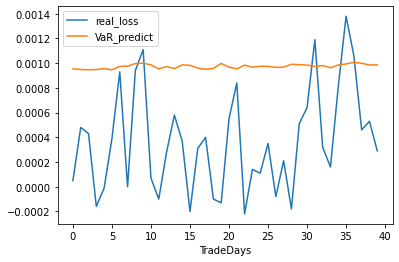

In [36]:
#data3['VaR_predict'].plot(label='VaR_predict')
#plt.size()
t1['real_loss'].plot(label='real_loss')
t1['VaR_montecarlo'][0:40].plot(label='VaR_predict')
plt.xlabel('TradeDays')
plt.legend()

In [37]:
t1['gap']=t1['VaR_montecarlo']-t1['real_loss']

In [38]:
t1[t1['gap']<0][['Date','gap']]

,Date,gap
9,2022-07-15,-0.000110
31,2022-08-16,-0.000217
35,2022-08-22,-0.000386
36,2022-08-23,-0.000052


In [39]:
data_real3=data_real2[1:61].reset_index()

In [40]:
data_real3

,index,Date,OpeningPrice,LowestPrice,HighestPrice,ClosingPrice
0,1,2022-07-04,0.14917,0.14917,0.14953,0.14920
1,2,2022-07-05,0.14920,0.14869,0.14954,0.14876
2,3,2022-07-06,0.14877,0.14877,0.14923,0.14904
3,4,2022-07-07,0.14904,0.14893,0.14931,0.14916
4,5,2022-07-08,0.14916,0.14905,0.14943,0.14932
5,6,2022-07-11,0.14931,0.14877,0.14931,0.14880
6,7,2022-07-12,0.14840,0.14838,0.14876,0.14865
7,8,2022-07-13,0.14867,0.14840,0.14885,0.14879
8,9,2022-07-14,0.14880,0.14773,0.14880,0.14796
9,10,2022-07-15,0.14800,0.14769,0.14825,0.14794


In [41]:
data3=pd.DataFrame({'Start':data_real2['OpeningPrice'][0:40],'Lowest_real':data_real3['LowestPrice'][0:40],'lowerbound_montecarlo':t1['5_quantile'][0:40]})

In [42]:
data3

,Start,Lowest_real,lowerbound_montecarlo
0,0.14922,0.14917,0.148266
1,0.14917,0.14869,0.148221
2,0.14920,0.14877,0.148253
3,0.14877,0.14893,0.147821
4,0.14904,0.14905,0.148085
5,0.14916,0.14877,0.148214
6,0.14931,0.14838,0.148336
7,0.14840,0.14840,0.147424
8,0.14867,0.14773,0.147673
9,0.14880,0.14769,0.147800


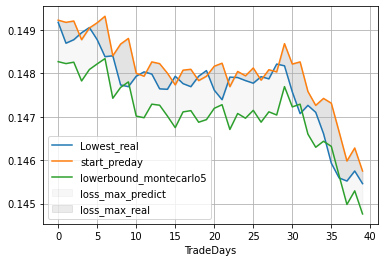

In [43]:
data3['Lowest_real'].plot(label='Lowest_real')
data3['Start'].plot(label='start_preday')
#data_real5['开盘'][1:41].plot()
data3['lowerbound_montecarlo'].plot(label='lowerbound_montecarlo5')
#t2['10_quantile'][0:40].plot(label='lowerbound_m10')

plt.fill_between(data3.index,data3['lowerbound_montecarlo'], 
                 data3['Start'],color='k',alpha=.03,
                 label = "loss_max_predict")

plt.fill_between(data3.index,data3['Lowest_real'], 
                 data3['Start'],color='k',alpha=.08,
                 label = "loss_max_real")



plt.xlabel('TradeDays')
plt.legend()
plt.grid()
plt.show()